In [1]:
import numpy as np
import pandas as pd
import re
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

## Loading Dataset

In [2]:
df = pd.read_csv("heart_disease_3.csv")

In [3]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [4]:
df.tail(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No
319794,No,46.56,No,No,No,0,0,No,Female,80 or older,Hispanic,No,Yes,Good,8,No,No,No


## Cleaning the data

### 1.Checking for Missing values

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### 2. Checking the distribution of target variable

In [6]:
# distribution count of target variable "stroke"
df["Stroke"].value_counts()

No     307726
Yes     12069
Name: Stroke, dtype: int64

#### As the target variable is unbalanced lets apply resampling technique - Undersampling

In [7]:
majority_class = df[df['Stroke'] == 'No']
minority_class = df[df['Stroke'] == 'Yes']

# Undersampling the majority class
majority_undersampled = resample(majority_class,
                                 replace = False,
                                 n_samples = len(minority_class),
                                 random_state = 68)

balanced_df = pd.concat([majority_undersampled, minority_class])

print(balanced_df['Stroke'].value_counts())

No     12069
Yes    12069
Name: Stroke, dtype: int64


In [8]:
## As our target variable is balanced in the dataset now, lets continue to analyze the data
balanced_df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
265589,No,24.78,No,No,No,0,0,No,Male,60-64,White,No,Yes,Excellent,7,Yes,No,No
74795,No,26.63,No,No,No,8,0,Yes,Female,70-74,White,Yes,Yes,Good,9,No,Yes,No
303183,No,23.41,No,No,No,0,0,No,Female,35-39,White,No,No,Excellent,6,No,No,No
209960,No,23.67,No,No,No,0,5,No,Male,35-39,White,No,Yes,Very good,5,No,No,No
177613,No,49.13,No,No,No,0,0,Yes,Female,65-69,White,Yes,No,Good,7,No,No,No


In [9]:
balanced_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## Data Mining Data Analysis

### 1. How Body weight is effecting the Heart Stroke

In [10]:
## Creating a new feature "Body_Weight" based on the BMI of a person
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

balanced_df['Body_Weight'] = balanced_df['BMI'].apply(categorize_bmi)
print(balanced_df.head())

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
265589           No  24.78      No              No     No               0   
74795            No  26.63      No              No     No               8   
303183           No  23.41      No              No     No               0   
209960           No  23.67      No              No     No               0   
177613           No  49.13      No              No     No               0   

        MentalHealth DiffWalking     Sex AgeCategory   Race Diabetic  \
265589             0          No    Male       60-64  White       No   
74795              0         Yes  Female       70-74  White      Yes   
303183             0          No  Female       35-39  White       No   
209960             5          No    Male       35-39  White       No   
177613             0         Yes  Female       65-69  White      Yes   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  \
265589              Yes

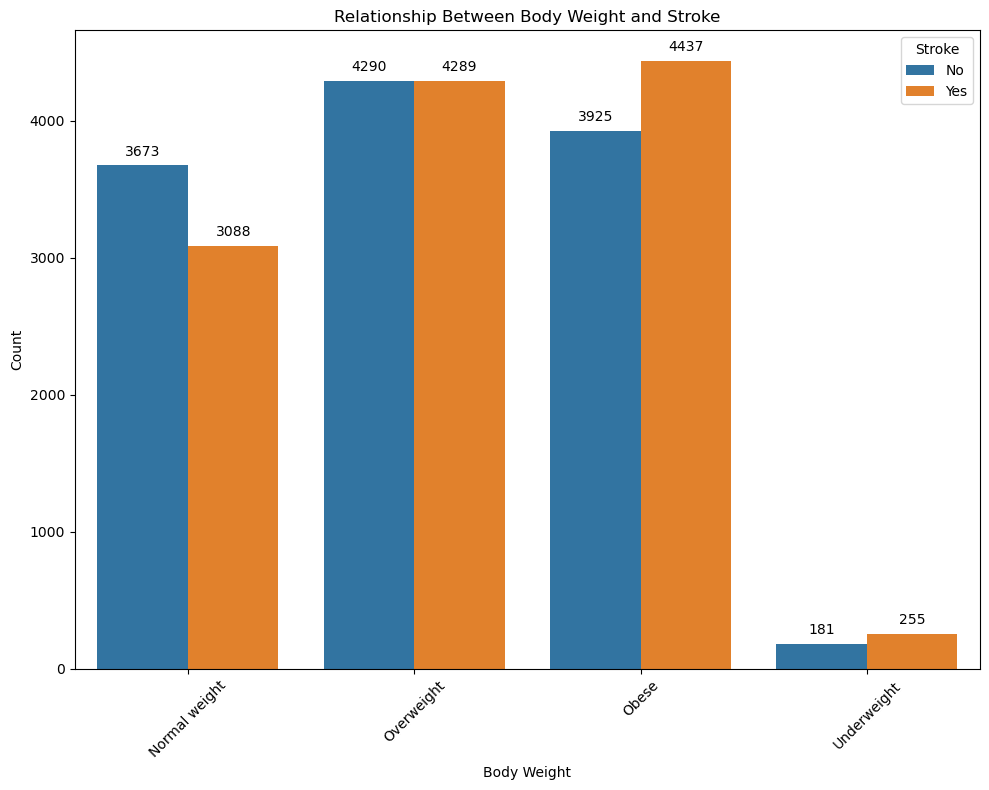

In [11]:
## Grouped Bar chart to analyze the visualization between Body Weight and Stroke Risk
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Body_Weight', hue='Stroke', data=balanced_df)

# Add counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Relationship Between Body Weight and Stroke')
plt.xlabel('Body Weight')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Age Category and General Health of a patient with the Target variable


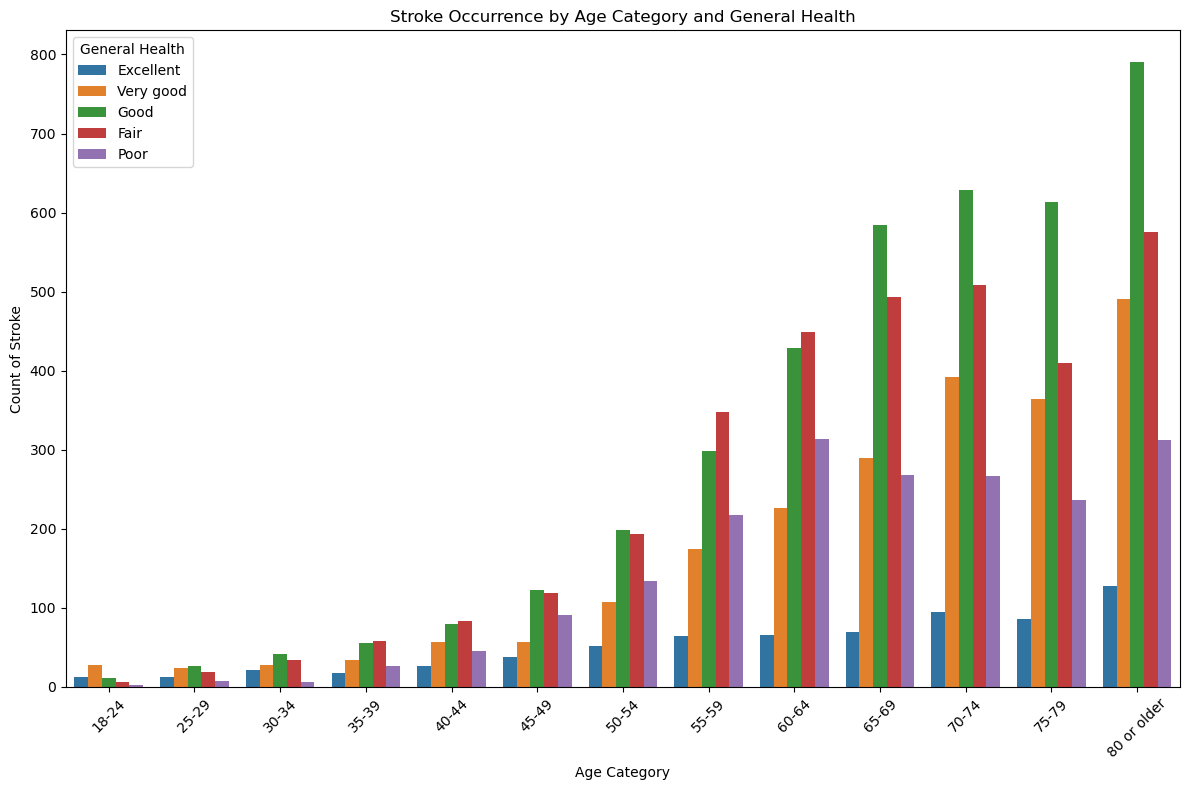

In [12]:
age_ranges = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
             '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
general_health = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

# Considering only when Stroke == Yes
df_stroke = balanced_df[balanced_df['Stroke'] == 'Yes']

# Stacked bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='AgeCategory', hue='GenHealth', data=df_stroke, order=age_ranges, hue_order=general_health)
plt.title('Stroke Occurrence by Age Category and General Health')
plt.xlabel('Age Category')
plt.ylabel('Count of Stroke')
plt.legend(title='General Health')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
### Checking the distirbution of the General health categroies when stroke == Yes
balanced_df[balanced_df['Stroke'] == 'Yes']['GenHealth'].value_counts()

Good         3879
Fair         3298
Very good    2272
Poor         1929
Excellent     691
Name: GenHealth, dtype: int64

### 3. Analyzing the how the Physical Activity and Smoking are effecting the Target variable

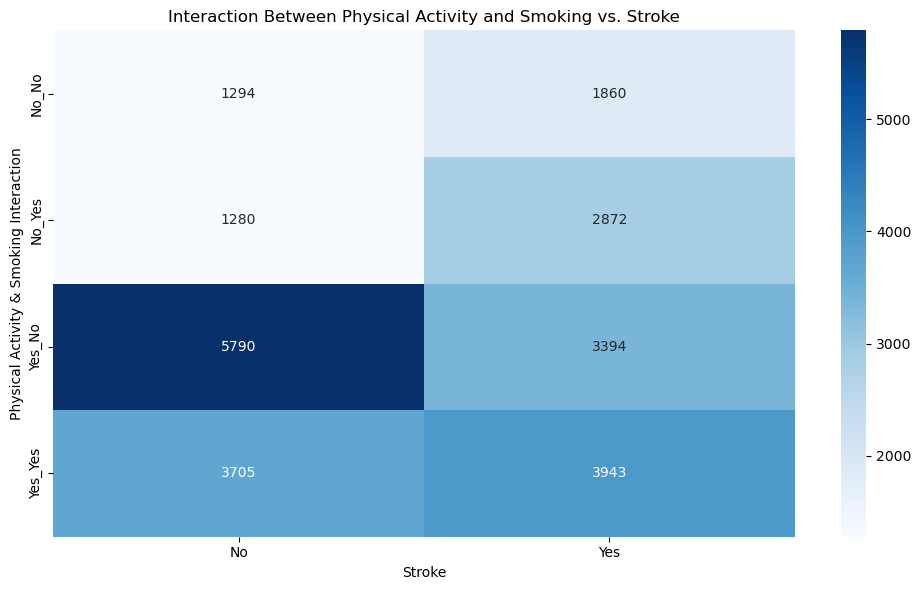

In [14]:
###### Creating a new feature which is a combination of Physical Activity and Smoking to analyze the relationship with Target variable
balanced_df['PhysicalActivity_Smoking_Interaction'] = balanced_df['PhysicalActivity'] + '_' + balanced_df['Smoking']

second_new_feature = pd.crosstab(balanced_df['PhysicalActivity_Smoking_Interaction'], balanced_df['Stroke'])

# Visualizaing the relationship through heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(second_new_feature, annot=True, fmt='d', cmap='Blues')
plt.title('Interaction Between Physical Activity and Smoking vs. Stroke')
plt.xlabel('Stroke')
plt.ylabel('Physical Activity & Smoking Interaction')
plt.xticks(ticks=[0.5, 1.5], labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


### 4. Extracting 3rd new feature from the existing "SleepTime" column

#### Lets Categroize the Sleep times and create a new feature for further analysis

In [15]:
sleep_time_bins = [0, 5, 7, 12]
sleep_time_labels = ['Sleep Deprived', 'Optimal Sleep', 'Excessive Sleep']

balanced_df['Sleep_Category'] = pd.cut(balanced_df['SleepTime'], bins=sleep_time_bins, labels=sleep_time_labels, right=False)
print(balanced_df[['SleepTime', 'Sleep_Category']].head())

        SleepTime   Sleep_Category
265589          7  Excessive Sleep
74795           9  Excessive Sleep
303183          6    Optimal Sleep
209960          5    Optimal Sleep
177613          7  Excessive Sleep


In [16]:
balanced_df['Sleep_Category'] = balanced_df['Sleep_Category'].astype('category')
# categorical_cols = categorical_cols.append(pd.Index(['Sleep_Category']))

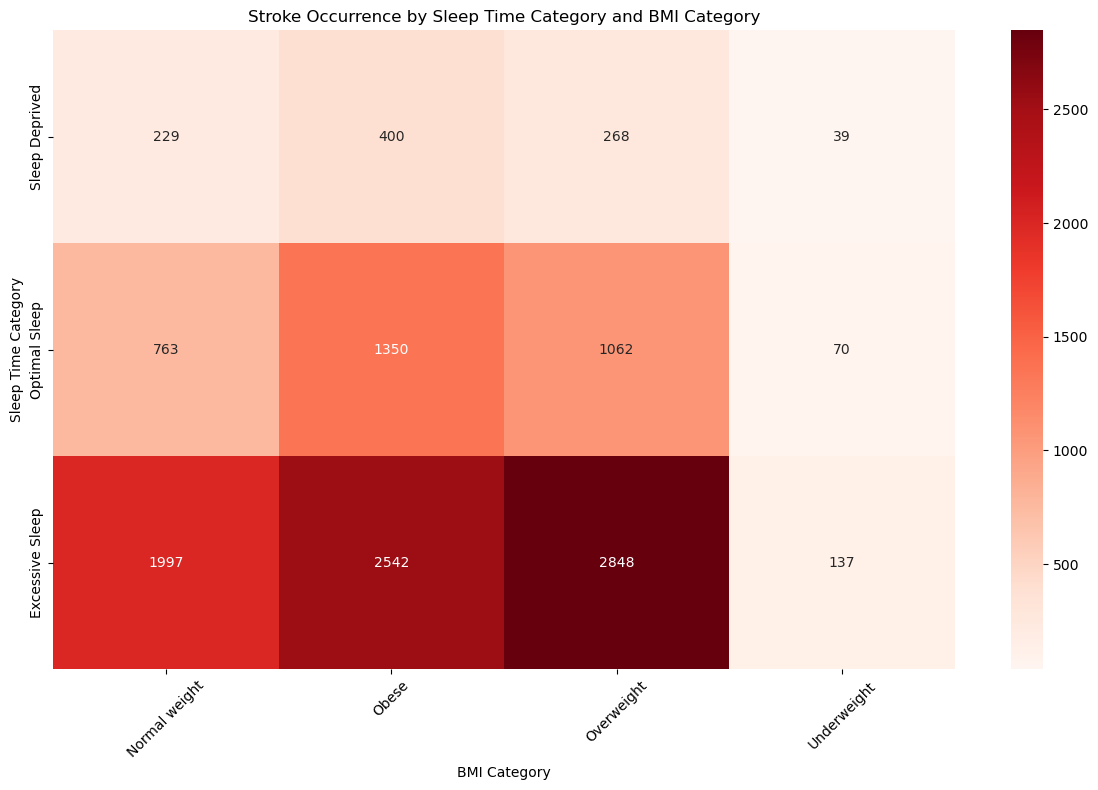

In [17]:
# Considering only when Stroke == Yes
df_stroke = balanced_df[balanced_df['Stroke'] == 'Yes']

heatmap_df = df_stroke.pivot_table(index='Sleep_Category', columns='Body_Weight', aggfunc='size', fill_value=0)
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, cmap='Reds', annot=True, fmt='d')
plt.title('Stroke Occurrence by Sleep Time Category and BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Time Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Analysis of the relationship bewtween Race and Stroke

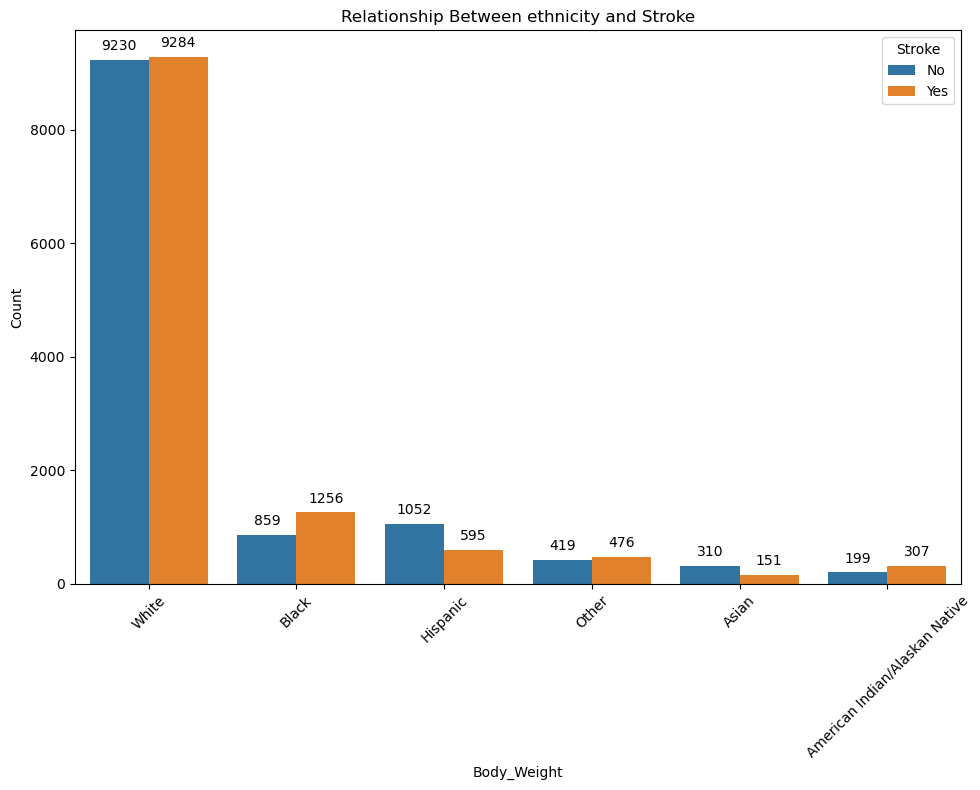

In [18]:
# Plotting the relationship between BMI category and Stroke using a bar plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Race', hue='Stroke', data=balanced_df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Relationship Between ethnicity and Stroke')
plt.xlabel('Body_Weight')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 6. Analysis of the relationship bewtween Gender and Stroke

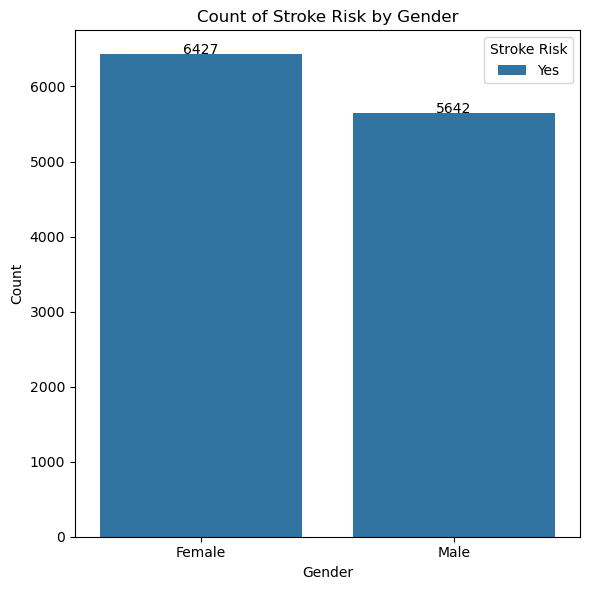

In [19]:
## Visualizing Stroke count by gender
df_stroke = df[df['Stroke'] == 'Yes']

# Grouped Bar Plot with stroke risk(target) on X-axis and gender on Y-axis
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df_stroke, x='Sex', hue='Stroke')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 3),
                   textcoords = 'offset points')

plt.title('Count of Stroke Risk by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Stroke Risk')
plt.tight_layout()
plt.show()

### 7. Creating 4th new feature "Comorbidity Score"  with the already existing features

In [20]:
# Scores for each health condition
health_scores = {
    'HeartDisease': 3,
    'Diabetic': 1,
    'Asthma': 2,
    'KidneyDisease': 2,
    'SkinCancer': 2
}

# Replacing 'Yes' with 1 and 'No' with 0 for the health condition columns
for condition in ['HeartDisease', 'Diabetic', 'Asthma', 'KidneyDisease','SkinCancer']:
    balanced_df[condition] = balanced_df[condition].replace({'Yes': 1, 'No': 0})

balanced_df[['HeartDisease', 'Diabetic', 'Asthma', 'KidneyDisease','SkinCancer']] = balanced_df[['HeartDisease', 'Diabetic', 'Asthma', 'KidneyDisease','SkinCancer']].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0
balanced_df[['HeartDisease', 'Diabetic', 'Asthma', 'KidneyDisease','SkinCancer']] = balanced_df[['HeartDisease', 'Diabetic', 'Asthma', 'KidneyDisease','SkinCancer']].fillna(0)

# Calculate comorbidity score for each individual
balanced_df['ComorbidityScore'] = balanced_df[['HeartDisease', 'Diabetic', 'Asthma', 'KidneyDisease','SkinCancer']].sum(axis=1)
print(balanced_df[['HeartDisease', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer','ComorbidityScore']].head())

        HeartDisease  Diabetic  Asthma  KidneyDisease  SkinCancer  \
265589             0       0.0       1              0           0   
74795              0       1.0       0              1           0   
303183             0       0.0       0              0           0   
209960             0       0.0       0              0           0   
177613             0       1.0       0              0           0   

        ComorbidityScore  
265589               1.0  
74795                2.0  
303183               0.0  
209960               0.0  
177613               1.0  


In [21]:
balanced_df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Body_Weight,PhysicalActivity_Smoking_Interaction,Sleep_Category,ComorbidityScore
265589,0,24.78,No,No,No,0,0,No,Male,60-64,...,Yes,Excellent,7,1,0,0,Normal weight,Yes_No,Excessive Sleep,1.0
74795,0,26.63,No,No,No,8,0,Yes,Female,70-74,...,Yes,Good,9,0,1,0,Overweight,Yes_No,Excessive Sleep,2.0
303183,0,23.41,No,No,No,0,0,No,Female,35-39,...,No,Excellent,6,0,0,0,Normal weight,No_No,Optimal Sleep,0.0
209960,0,23.67,No,No,No,0,5,No,Male,35-39,...,Yes,Very good,5,0,0,0,Normal weight,Yes_No,Optimal Sleep,0.0
177613,0,49.13,No,No,No,0,0,Yes,Female,65-69,...,No,Good,7,0,0,0,Obese,No_No,Excessive Sleep,1.0


### 8.  Created a 5th new feature "Vulnerability" - Predicting the Mortality rate

In [22]:
# Thresholds for comorbidity score, age, and severity -- Can be customized
comorbidity_threshold = 3
age_threshold = 65
severity_threshold = 2

# Function to determine mortality based on comorbidity score, age, and severity
def determine_vulnerability_complex(row):
    comorbidity_score = row['ComorbidityScore']
    age_category = row['AgeCategory']

    try:
        age = int(age_category.split('-')[0])  # Extracting the lower bound of age category
    except (ValueError, AttributeError):
        age = 0  # Default age if the conversion fails

    if comorbidity_score >= comorbidity_threshold:
        if age >= age_threshold:
            if comorbidity_score >= severity_threshold:
                return 'Highly vulnerable'
            else:
                return 'Vulenrable'
        else:
            return 'Less vulenrable'
    else:
        return 'Not vulernable'

balanced_df['Vulnerablity'] = balanced_df.apply(determine_vulnerability_complex, axis=1)
print(balanced_df.tail(5))

        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
319588             0  30.56      No              No    Yes              21   
319619             1  39.31      No              No    Yes               3   
319620             1  27.64      No              No    Yes               1   
319740             0  26.07      No              No    Yes               0   
319765             1  38.45      No              No    Yes              30   

        MentalHealth DiffWalking     Sex AgeCategory  ... GenHealth  \
319588             2         Yes    Male       50-54  ...      Good   
319619             0         Yes  Female       65-69  ...      Fair   
319620             0         Yes    Male       50-54  ...      Good   
319740             0          No  Female       60-64  ...      Good   
319765            15         Yes  Female       55-59  ...      Poor   

        SleepTime Asthma KidneyDisease  SkinCancer  Body_Weight  \
319588          8      0             

## Preprocessing

In [23]:
balanced_df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Body_Weight,PhysicalActivity_Smoking_Interaction,Sleep_Category,ComorbidityScore,Vulnerablity
265589,0,24.78,No,No,No,0,0,No,Male,60-64,...,Excellent,7,1,0,0,Normal weight,Yes_No,Excessive Sleep,1.0,Not vulernable
74795,0,26.63,No,No,No,8,0,Yes,Female,70-74,...,Good,9,0,1,0,Overweight,Yes_No,Excessive Sleep,2.0,Not vulernable
303183,0,23.41,No,No,No,0,0,No,Female,35-39,...,Excellent,6,0,0,0,Normal weight,No_No,Optimal Sleep,0.0,Not vulernable
209960,0,23.67,No,No,No,0,5,No,Male,35-39,...,Very good,5,0,0,0,Normal weight,Yes_No,Optimal Sleep,0.0,Not vulernable
177613,0,49.13,No,No,No,0,0,Yes,Female,65-69,...,Good,7,0,0,0,Obese,No_No,Excessive Sleep,1.0,Not vulernable


In [24]:
# Displaying numerical and categorical columns
numerical_cols = balanced_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = balanced_df.select_dtypes(include=['object']).columns


print("Numerical Columns:")
print(numerical_cols)
print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
Index(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'Diabetic',
       'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'ComorbidityScore'],
      dtype='object')

Categorical Columns:
Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'PhysicalActivity', 'GenHealth', 'Body_Weight',
       'PhysicalActivity_Smoking_Interaction', 'Vulnerablity'],
      dtype='object')


In [25]:
print(balanced_df['Sleep_Category'].unique())

['Excessive Sleep', 'Optimal Sleep', 'Sleep Deprived', NaN]
Categories (3, object): ['Sleep Deprived' < 'Optimal Sleep' < 'Excessive Sleep']


### Label encoding the Caterogical columns in order to make the dataset ready for the Modelling

In [26]:
label_encoder = LabelEncoder()

for col in categorical_cols:
    balanced_df[col] = label_encoder.fit_transform(balanced_df[col])
print(balanced_df.head())

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
265589             0  24.78        0                0       0               0   
74795              0  26.63        0                0       0               8   
303183             0  23.41        0                0       0               0   
209960             0  23.67        0                0       0               0   
177613             0  49.13        0                0       0               0   

        MentalHealth  DiffWalking  Sex  AgeCategory  ...  GenHealth  \
265589             0            0    1            8  ...          0   
74795              0            1    0           10  ...          2   
303183             0            0    0            3  ...          0   
209960             5            0    1            3  ...          4   
177613             0            1    0            9  ...          2   

        SleepTime  Asthma  KidneyDisease  SkinCancer  Body_Weight  \
265589          7

In [27]:
label_encoder = LabelEncoder()

balanced_df['Sleep_Category'] = label_encoder.fit_transform(balanced_df['Sleep_Category'])
print(balanced_df.head(5))

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
265589             0  24.78        0                0       0               0   
74795              0  26.63        0                0       0               8   
303183             0  23.41        0                0       0               0   
209960             0  23.67        0                0       0               0   
177613             0  49.13        0                0       0               0   

        MentalHealth  DiffWalking  Sex  AgeCategory  ...  GenHealth  \
265589             0            0    1            8  ...          0   
74795              0            1    0           10  ...          2   
303183             0            0    0            3  ...          0   
209960             5            0    1            3  ...          4   
177613             0            1    0            9  ...          2   

        SleepTime  Asthma  KidneyDisease  SkinCancer  Body_Weight  \
265589          7

## Splitting

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Features and target variable
X = balanced_df.drop('Stroke', axis=1)  # Drop the target column to create a feature matrix
y = balanced_df['Stroke']  # This is the target variable

# Encoding categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Modelling

### Random Forest

In [29]:
#Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Function to calculate metrics
def evaluate_model(model, X_val, y_val):
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions, pos_label=1)
    recall = recall_score(y_val, predictions, pos_label=1)
    f1 = f1_score(y_val, predictions, pos_label=1)
    return accuracy, precision, recall, f1

# Evaluating the model on the validation set
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(random_forest, X_val, y_val)
results = {
    "Model": ["Random Forest"],
    "Accuracy": [rf_accuracy],
    "Precision ": [rf_precision],
    "Recall ": [rf_recall],
    "F1 Score ": [rf_f1]
}
results_df = pd.DataFrame(results)
print(results_df)

           Model  Accuracy  Precision    Recall   F1 Score 
0  Random Forest  0.733499    0.712794  0.766854   0.738836


### Gaussian Naive Bayes

In [30]:
# Gaussian Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Function to calculate metrics
def evaluate_model(model, X_val, y_val):
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions, pos_label=1)
    recall = recall_score(y_val, predictions, pos_label=1)
    f1 = f1_score(y_val, predictions, pos_label=1)
    return accuracy, precision, recall, f1

# Evaluating the model on the validation set
nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_model(naive_bayes, X_val, y_val)
results = {
    "Model": ["Gaussian Naive Bayes"],
    "Accuracy": [nb_accuracy],
    "Precision": [nb_precision],
    "Recall": [nb_recall],
    "F1 Score": [nb_f1]
}
results_df = pd.DataFrame(results)

print(results_df)

                  Model  Accuracy  Precision   Recall  F1 Score
0  Gaussian Naive Bayes  0.715824    0.76688  0.60618  0.677126


### Logistic Regression

In [31]:
# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
log_reg.fit(X_train, y_train)

# Function to calculate metrics
def evaluate_model(model, X_val, y_val):
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions, pos_label=1)
    recall = recall_score(y_val, predictions, pos_label=1)
    f1 = f1_score(y_val, predictions, pos_label=1)
    return accuracy, precision, recall, f1

# Evaluating the model on the validation set
log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1 = evaluate_model(log_reg, X_val, y_val)

results = {
    "Model": ["Logistic Regression"],
    "Accuracy": [log_reg_accuracy],
    "Precision": [log_reg_precision],
    "Recall": [log_reg_recall],
    "F1 Score": [log_reg_f1]
}
results_df = pd.DataFrame(results)

print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.740679   0.744904  0.718539  0.731484


## Tuning

### **Hyperparameter tuning for Random Forest**

In [32]:
#Hyper parameter tuning for RandomForest
from sklearn.ensemble import RandomForestClassifier

# parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40]
}

random_forest = RandomForestClassifier()

# GridSearchCV
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, verbose=1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score for Random Forest: 0.7537284410674353


### **Hyperparameter tuning for Gaussian Naive Bayes**

In [33]:
# parameter grid for Gaussian Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

naive_bayes = GaussianNB()

grid_search_nb = GridSearchCV(estimator=naive_bayes, param_grid=param_grid_nb, cv=5, verbose=1, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)
print("Best Parameters for Gaussian Naive Bayes:", grid_search_nb.best_params_)
print("Best Score for Gaussian Naive Bayes:", grid_search_nb.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Gaussian Naive Bayes: {'var_smoothing': 1.232846739442066e-06}
Best Score for Gaussian Naive Bayes: 0.718690519760932


### **Hyperparameter tuning for Logistic Regression**

In [41]:
# Prameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Algorithm to use in the optimization problem
    'max_iter': [10, 50, 75, 90]  # Number of iterations to converge
}

log_reg = LogisticRegression()

grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, verbose=1, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

best_params = grid_search_lr.best_params_
best_score = grid_search_lr.best_score_
print("Best Parameters for Logistic Regression:", best_params)
print("Best Score for Logistic Regression:", best_score)

## Convergence warning is common when trying different values for hyper parameters

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the

C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for Logistic Regression: {'C': 1, 'max_iter': 10, 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.7439034867288561


C:\Users\Sweekruthi Balivada\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# **Evaluation of Models**

In [35]:
def evaluate_model(name, model, X_val, y_val):
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions, pos_label=1)
    recall = recall_score(y_val, predictions, pos_label=1)
    f1 = f1_score(y_val, predictions, pos_label=1)
    return {
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }


In [36]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Naive Bayes", GaussianNB())
]

results = []

# Training and evaluation
for name, model in models:
    model.fit(X_train, y_train)
    results.append(evaluate_model(name, model, X_val, y_val))

results_df = pd.DataFrame(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.740679   0.744904  0.718539  0.731484
1        Random Forest  0.736813   0.717060  0.767416  0.741384
2          Naive Bayes  0.715824   0.766880  0.606180  0.677126


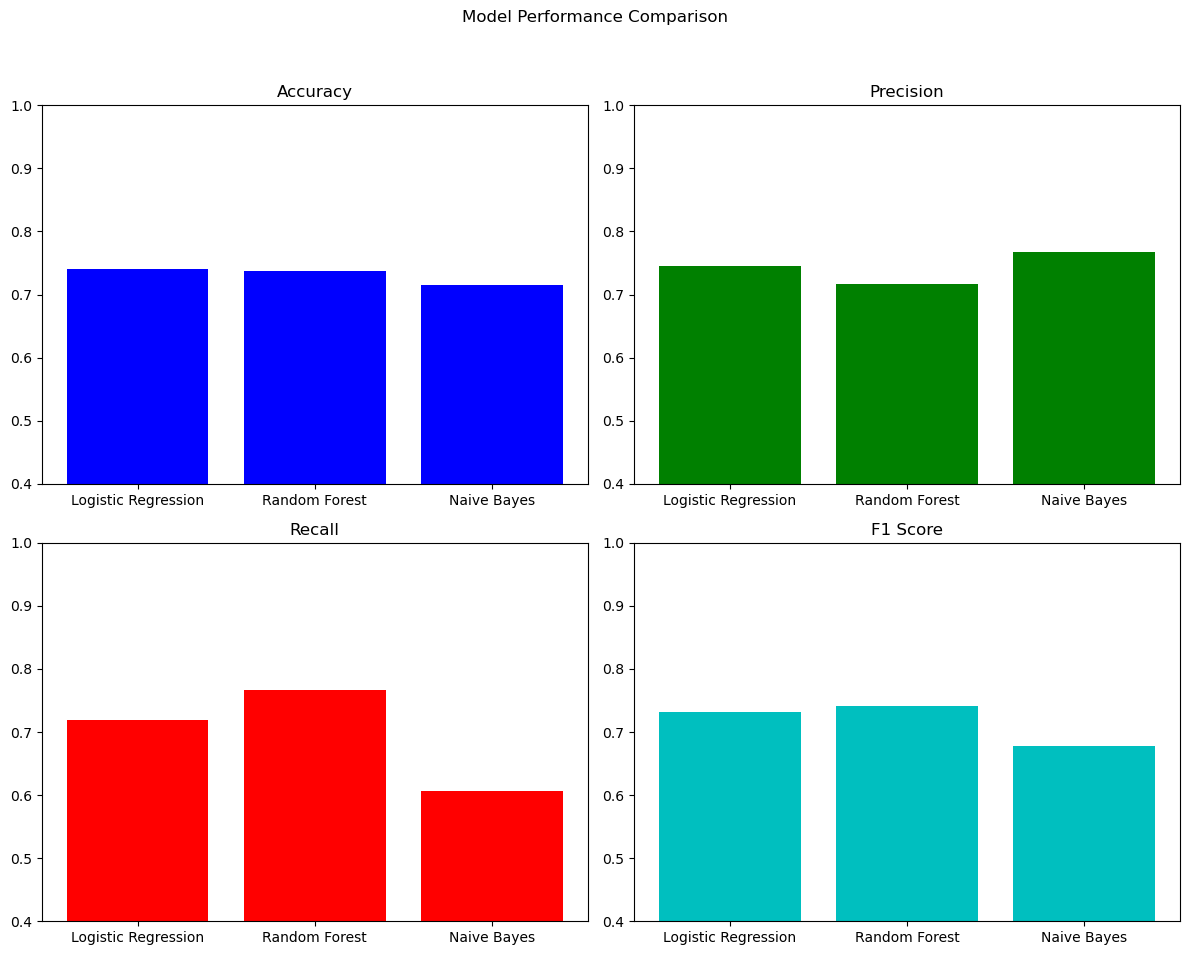

In [37]:
print(results_df)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Performance Comparison')
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['b', 'g', 'r', 'c']

for ax, metric, color in zip(axes.flatten(), metrics, colors):
    ax.bar(results_df['Model'], results_df[metric], color=color)
    ax.set_title(metric)
    ax.set_ylim([0.4, 1.0])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### **Models Performance Comparison before and after Hyperparameter Tuning**

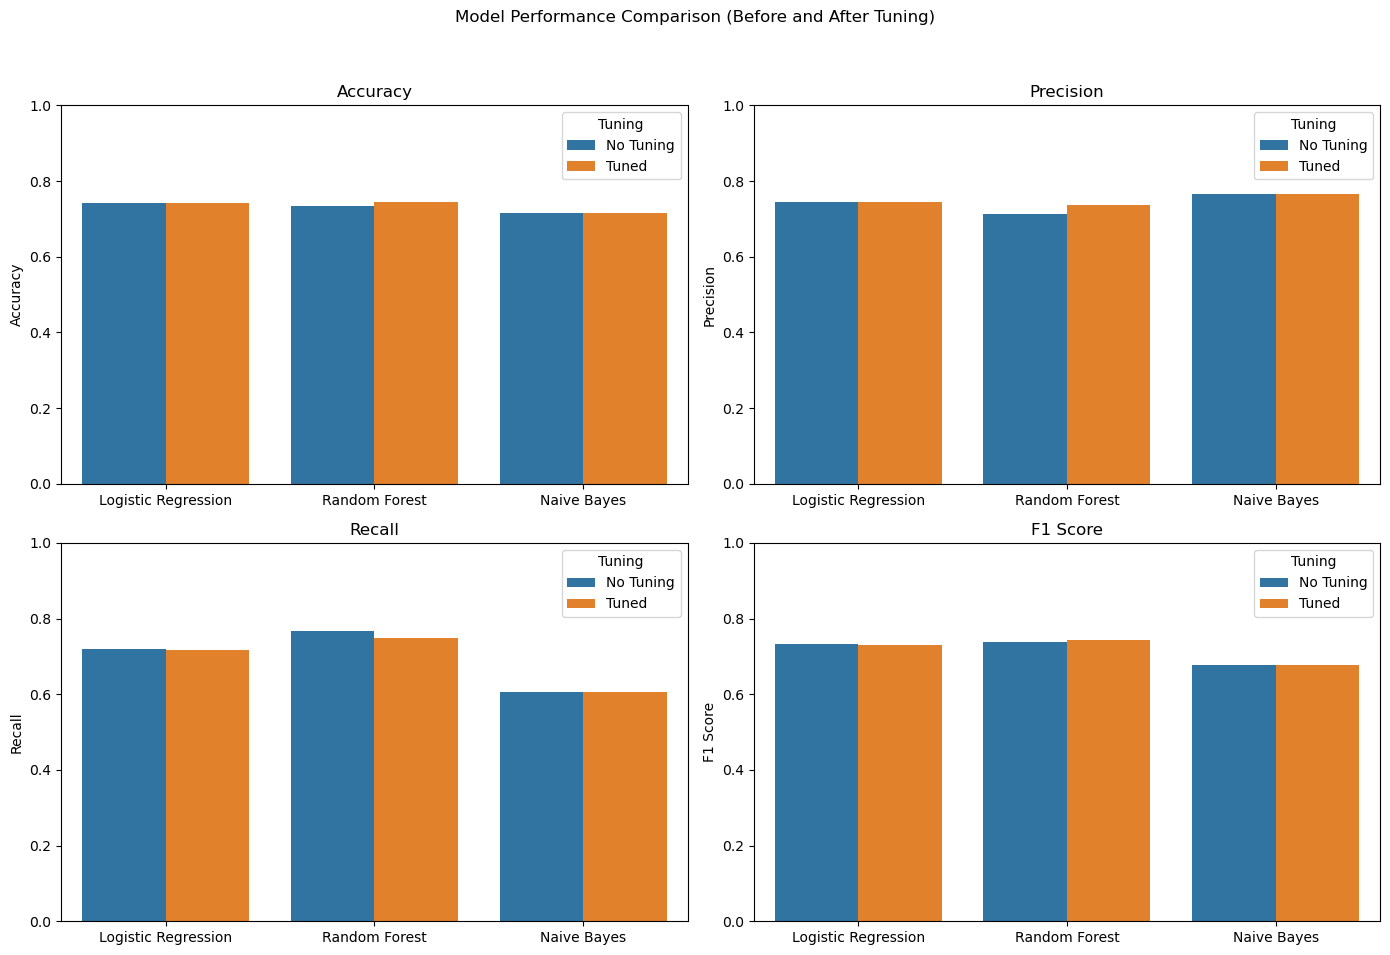

In [38]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Naive Bayes", GaussianNB())
]

# Parameter grids for GridSearchCV
param_grids = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']},
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20, None]},
    "Naive Bayes": {}
}

def evaluate_model(model, X_val, y_val):
    predictions = model.predict(X_val)
    return {
        "Accuracy": accuracy_score(y_val, predictions),
        "Precision": precision_score(y_val, predictions, pos_label=1, zero_division=0),
        "Recall": recall_score(y_val, predictions, pos_label=1),
        "F1 Score": f1_score(y_val, predictions, pos_label=1)
    }

results = []

for name, model in models:
    # Train and evaluate the base model
    model.fit(X_train, y_train)
    base_metrics = evaluate_model(model, X_val, y_val)
    base_metrics.update({"Model": name, "Tuning": "No Tuning"})
    results.append(base_metrics)

    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        tuned_metrics = evaluate_model(best_model, X_val, y_val)
        tuned_metrics.update({"Model": name, "Tuning": "Tuned"})
        results.append(tuned_metrics)

results_df = pd.DataFrame(results)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison (Before and After Tuning)')
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for ax, metric in zip(axes.flatten(), metrics):
    ax.set_title(metric)
    sns.barplot(data=results_df, x='Model', y=metric, hue='Tuning', ax=ax)
    ax.set_ylim(0, 1)
    ax.set_ylabel(metric)
    ax.set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()